<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>


<center><h1>Building a Model to Predict Survival for Titanic Passengers</h1></center>


**Welcome to _DS2: Introduction to Machine Learning_**!  This course will be all about _predictive analytics_--that is, using data and algorithms to make accurate predictions.  For our introductory exercise for this course, we're going to focus on the one of the areas where machine learning really shines--**_Classification_**.  We're going to examine the data and build a simple model to predict whether or not a passenger survived the Titanic disaster.  Here's the catch: before we use any machine learning, we're going to build a classifier by hand to gain an intuition about how classification actually works.  
<br>
<br>
<center><h2>The Gameplan</h2></center>

We're going to start by building the simplest model possible, and then slowly add complexity as we notice patterns that can make our classifier more accurate.  

Recall that we've investigated this dataset before, in DS1. We're going to use our _Data Analysis_ and _Visualization_ skills from DS1 to investigate our dataset and see if we can find some patterns that we can use in our prediction algorithm. In order to successfully build a prediction algorithm, we'll use the following process:

**1.  Load and explore the data.**  
    --We'll begin by reading our data into a dataframe, and then visualizing our data to see if we can find certain groups that had higher survival rates than others.  At this step, we'll also remove the `Survived` column from the dataframe and store it in a separate variable.  
    
**2.Write a prediction function.** 
<br>
    -- We'll write a function that takes in a dataframe and predicts 0 (died) or 1(survived) for each passenger based on whatever we decide is important.  This function should output a vector containing only 0's and 1's, where the first element is the prediction for the first passenger in the dataframe, the 2nd element is the prediction for the second passenger, etc.  
    
**3.  Write an evaluation function.**
<br>
    -- In order to evaluate how accurate our prediction function is, we'll need to track how it does.  To do this, we'll create a _confusion matrix_.  This matrix will exist as a dictionary that tracks the number of _True Positives_, _True Negatives_, _False Positives_, and _False Negatives_ our algorithm makes--don't worry if you haven't seen these terms before. We'll define them in a later section.
    
**4. Tweak our prediction function until we're happy!**
    --once we've built out the functions that underpin our predictive algorithm, we'll tweak them until we hit our desired accuracy metric.  In this case, **_we'll shoot for an accuracy of at least 80%._**
<br>
<br>
<center>Let's get started!</center>

In [3]:
#Import everything needed for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

<center><h2>Step 1: Load and Explore the Data</h2></center>

In this section, we'll:

1. Read the data from `titanic.csv` and store it in a dataframe (you'll find this file in the `/datasets` folder).
2. Remove the `Survived` column from the dataframe and store it as a Pandas Series in a variable. 
3. Create a general purpose function that visualizes survivors vs deaths in any data frame passed in.
4. Clean our dataframe (remove unnecessary columns, deal with null values, etc).  
5. Explore our data and figure out which groups are most likely to survive.


NOTE: There are many ways to successfully visualize survival rates across the different features. The most inuitive way to visualize survival rates as a stacked bar chart, where 'survived' and 'dead' are different colors on the same bar.  For an easy explanation of how to make these bar charts, see [this Stack Overflow question](https://stackoverflow.com/questions/41622054/stacked-histogram-of-grouped-values-in-pandas).

In [4]:
# Read in the titanic.csv dataset from the /datasets folder.  
raw_df = pd.read_csv('datasets/titanic.csv')

# Store the survived column in the labels variable, and then drop the column from the data frame.  
labels = None


#Don't forget to remove these columns from the dataframe!
columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_df= raw_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
titanic_df.head()

 
#study material for this dataset
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.zscore.html


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Survival rate based on Sex

### 74% percent of women survived
### 18% of men survived


In [5]:

titanic_df
#titanic_age_df.plot.hist()

titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Survival rate based on Pclass
### 62.9 % of 1st class people survived
### 47.3 % of 2nd class
### 24 % of 3rd class

In [6]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Survival rate based on where they embarked from
### 55.4% of people who boarded at Cherbourg, France survived
### 40% of people who boarded at  Queenstown, Ireland survived
### 33.6 % of people who boarded at SouthHampton, England Survived

In [7]:
titanic_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by ='Survived', ascending = False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Survival rate based on how many spouses or siblings were on board
### The more Spouses or siblings you had, the more likely you were to die
### 53% of people who had only 1 spouse or sibling survived
### 46% of people who had 2 spouses or siblings  survived
### 25% of people who had 3 spouses or siblings survived
### 16% of people who had 4 spouses or siblings survived
### 0 % of 5 and the max of 6 spouses or siblings survived

In [8]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by ='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Survival rate based on how many parents or children were on board
### 34% of people who had no parents or siblings on board survived
### 55% of people who had 1 parent or sibling survived
### 50% of people who had 2 parents or siblings survived
### 60% of people who had 3 parents or siblings survived
### 0% of people who had 4 parents or siblings survived
### 20% of people who had 5 parents or siblings survived
### 0% of people who had 6 parents or siblings survived

In [9]:
titanic_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by ='Survived', ascending = True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


## REMOVING AND STORING SURVIVED AS ITS OWN DATAFRAME


In [10]:
survived__column_df = titanic_df['Survived']

survived__column_df.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [11]:

train_df =titanic_df.drop(['Survived'],axis=1)
#done with dropping the oher data frame
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


# -----------------------------------------------------------------------------------------------------------

### 2.Write a prediction function. 

### We'll write a function that takes in a dataframe and predicts 0 (died) or 1(survived) for each passenger based on whatever we decide is important. This function should output a vector containing only 0's and 1's, where the first element is the prediction for the first passenger in the dataframe, the 2nd element is the prediction for the second passenger, etc.

Next, we'll create a function that allows us to quickly visualize the survival rates of any dataframe of passengers.  This way, we can iterate quickly by slicing our dataframe and visualizing the survival rate to see if we can find any patterns that will be useful to us.  

As an example, if we wanted to visualize the survival rates of men versus women, we would create a dataframe object that contains only the information that matters to us, and then pass it into this function.  When completed, this function should output a histogram plot that looks like the ones seen in the Stack Overflow link listed above.  

In [12]:
 train_df['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

/Users/donovanadams/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


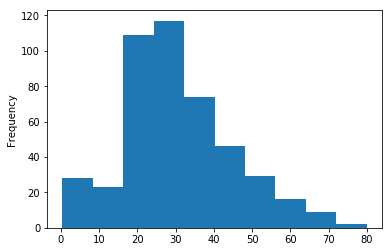

In [13]:
test_df = train_df[(train_df['Sex']== 'male')]
test_df[train_df['Sex']== 'male']['Age'].plot(kind='hist')

In [14]:
# Create a function used to visualize survival rates for the data frame passed in
def visualize_survival_rates(dataframe, xlabel=None, ylabel="Count"):
    """    
    Inputs: dataframe--a pandas dataframe object consisting of the things you want visualized.  
            labels--a pandas series object that tells us whether each passenger died (0) or survived(1)
            
    Outputs: A 2 color histogram that visualizes the survival rate of passengers based on the values contained 
    within the dataframe.  For instance, if we pass in a visualization 
    
    NOTE: You should rely on the dataframe's .hist() method to do most of the heavy lifting for visualizations.  
    Any slicing of the dataframe should be done BEFORE you call this function.  For instance, if you want to visualize
    survival rates of men under 30 vs women under 30, you should create a dataframe containing only these rows and 
    columns before passing it into this function, rather than passing in the full original dataframe.  This will 
    allow you to keep the logic in this function simple.
    
    """
    #MUST CONVERT TO DATA FRAME FOR INDEXING
    xlabel=xlabel.to_frame()
    #print(type(xlabel))
    #print(xlabel.describe())
    plt.figure();
    ## converts into a grpahble figure
    merged_df = pd.concat([dataframe, xlabel], axis=1)
    #print(merged_df.describe())

    g = sns.FacetGrid(merged_df, col='Survived')
    
    g.map(plt.hist,"Age", bins=20)
        
    g = sns.FacetGrid(merged_df, col='Survived')
    
    g.map(plt.hist,"Parch", bins=20)
    
    g = sns.FacetGrid(merged_df, col='Survived')
    
    g.map(plt.hist,"SibSp", bins=20)
    
    g = sns.FacetGrid(merged_df, col='Survived')
    
    g.map(plt.hist,"Fare", bins=20)
    
    
   
   


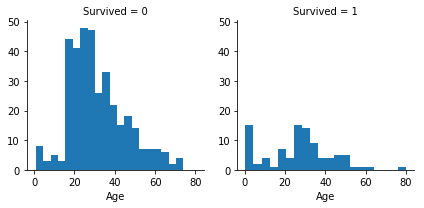

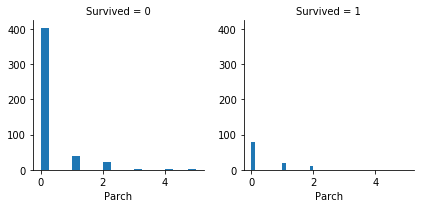

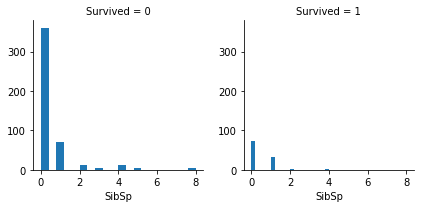

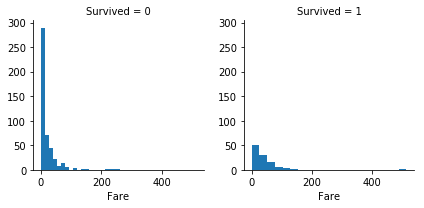

In [15]:
visualize_survival_rates(test_df,survived__column_df)

<center><h3>Building a Prediction Function</h3></center>

Next, we'll write a prediction function.  We'll use basic control flow to examine each row in the data set and make a prediction based on whatever we think is important.  If you explored the data set, you may have stumbled upon a few interesting discoveries, such as:

* Women were more likely to survive than men.  
* Rich people were more likely to survive than poor people.  
* Young people were more likely to survive than others.  

(NOTE: We made these up--don't automatically assume they're true without investigating first!)

These may seem obvious, but don't discount their usefulness! We can use these facts to build a prediction function that has decent accuracy! For instance, let's pretend that we found that 80% of all women survived.  Knowing this, if we then tell our algorithm to predict than all female passengers survived, we'll be right 80% of the time for female passengers! 

Complete the following prediction function.  It should take in a dataframe of titanic passengers.  Based on the things you think are important (just use a bunch of nested control flow statements), you'll output a 1 if you think this passenger survived, or a if you think they died.  

The function should output an array where the first item is the prediction for the first row in the dataframe, the 2nd item in the array is the prediction for the seconf row in the dataframe, etc.  

In [16]:
def predictions_from_df(dataframe):
    predictions = []
    # WRITE YOUR PREDICTION CODE BELOW!
    # AS OF NOW PREDICTIONS HAVE NOT BEEN CLACULATED
    #the 1 or zero is the representation of being dead or alive in the sample
    for n in range( len(dataframe)):
        #A representation of a person who might fit the profile and how they may or may not survive
        Survived = dataframe.iloc[n]
        #Personally think that sex is the most importat factor in survival                        
        sex = person['Sex']
        #Second most important as mosre preople from the firstclass survived than age groups as a control, vs sex(80% female)
        pclass = person['Pclass']
        #Least important significant data thats not fare
        age = person['Age']
        # if the person is a first class female within a certain range 12-under for children, adolescents at 13-19, young/mid adults from 20-40
        #
        if pclass == 1:
            if sex == "female":
                predict.append(1)
            elif age < 12 or (age > 13 and age < 19) or (age > 20 and age < 40) or(age > 41 and age< 60) or (age > 61 < 80 ) :
                predict.append(1)
            else:
                predict.append(0)
         #second class females by age
        elif pclass == 2:
            if sex == "female":
                predict.append(1)
            elif age < 12 or (age > 13 and age < 19) or (age > 20 and age < 40) or(age > 41 and age< 60) or (age > 61 < 80 ):
                predict.append(1)
            else:
                predict.append(0)
        # 3RD CLASS FEMALES
        elif pclass == 3:
            if sex == "female":
                if age < 12 or (age > 13 and age < 19) or (age > 20 and age < 40) or(age > 41 and age< 60) or (age > 61 < 80 ):
                    predict.append(1)
                else:
                    predict.append(0)
            elif age < 15:
                predict.append(1)
            else:
                predict.append(0)
    return predict
    #SHOULD return a 1 or zero value as to survival

    

<center><h3>Evaluating Your Predictions</h3></center>

Great! Now we've evaluated our data and made a bunch of predictions--but predictions are only interesting if they're accurate.  In order to do this, we're going to create a **_Confusion Matrix_** to track what we got right and wrong (and _how_ we were right and wrong).  

There are 4 different possible outcomes for each prediction:

1. **True Positive** -- You predicted they survived (1), and they actually survived (1). 
2. **True Negative** -- You predicted they died (0), and they actually died (0).
3. **False Positive** -- You predicted they survived (1), and they actually died (0).
4. **False Negative** -- You predicted they died (0), and they actually survived (1).

We're going to write a function that takes in our predictions and the actual labels (the "Survived" column we removed from the actual data frame), and determines which possible outcome we had for each prediction.  We will keep track of how many times each outcome happened by incrementing a counter for each in our _Confusion Matrix_ dictionary.


In [17]:
def create_confusion_matrix(predictions, labels):
    confusion_matrix = {"TP": 0, "TN": 0, "FP": 0, "FN": 0}
    
    # Recall each index in both 'predictions' and 'labels' are referring to the corresponding row.  
    # E.G. predictions[0] and label [0] both refer to row 0 in the dataframe that was passed into the 
    # prediction function.
    
    #TODO: Create the confusion matrix by comparing the values in predictions to the corresponding values in labels.  
    # Use the definitions in the text above to determine which item in the dictionary you should increment. 
    # if you think they died
    #predictions
    #integer, the row(the survivved status of that person, tp be compared to the prediction and the matrix)
    #labels
    
    merged_df = pd.concat([train_df, survived__column_df], axis=1)
    #TRUE POSITIVE
    if merged_df.iloc[labels]["Survived"]==1 and prediction ==1:
        return confusion_matrix[0]
    #
    elif merged_df.iloc[labels]["Survived"]==1 and prediction == 0:
        return confusion_matrix[1]
    elif merged_df.iloc[labels]["Survived"]==0 and prediction ==1:
        return confusion_matrix[2]
    else:
        return confusion_matrix[3]
    


def get_accuracy(confusion_matrix):
    # Create a function that returns the accuracy score for your classifier.  
    # The formula for accuracy = TP + TN / TP + TN + FP + FN
    
    accuracy = 
    return

SyntaxError: invalid syntax (<ipython-input-17-c4efaafb9c9f>, line 33)

<center><h3>Where to Go From Here</h3></center>

Now that you have a way to evaluate your predictions, modify your prediction function until you can achieve an evaluation score above 80%!

In [19]:
train_df.iloc[:1,6:]
#survived_df[]
merged_df = pd.concat([train_df, survived__column_df], axis=1)

print(merged_df.iloc[1]['Survived'] ==1)

True
